# Regression - Engineering

## Exercise 1: Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [1258]:
import numpy as np
from math import sqrt
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import statsmodels.stats.outliers_influence as variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [1149]:
# exercise 1
data = pd.read_csv('../data/tennis.csv')
dft = data.copy()
dft.iloc[:,:20].head(3)

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,opponent,ranking,score,stats link,tournament.1,tournament round,time,winner,player1 name,player1 nationality
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,Andre Agassi (USA),8,"L 3-6, 2-6",http://www.atpworldtour.com/Share/Match-Facts-...,Basel,R32,60,Andre Agassi,Roger Federer,Switzerland
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,Guillaume Raoux (FRA),45,"W 6-2, 6-2",http://www.atpworldtour.com/Share/Match-Facts-...,Toulouse,R32,60,Roger Federer,Roger Federer,Switzerland
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,Richard Fromberg (AUS),43,"W 6-1, 7-6(5)",http://www.atpworldtour.com/Share/Match-Facts-...,Toulouse,R16,85,Roger Federer,Roger Federer,Switzerland


In [1150]:
df = dft[['surface', 'player1 total points total']]
df.columns = ['surface', 'Federe_total_points_total']
#dft.columns

In [1151]:
df = df.dropna()
#df.info()

In [1152]:
df.surface.unique()

array(['Indoor: Hard', 'Outdoor: Clay', 'Indoor: Carpet', 'Outdoor: Hard',
       'Outdoor: Grass'], dtype=object)

In [1153]:
yt = df['Federe_total_points_total']
xt =pd.DataFrame(pd.get_dummies(df['surface'], drop_first=True))
xt = sm.add_constant(xt)
model_t = sm.OLS(yt, xt).fit(cov_type='HC2')
#model_t = smf.ols(formula=('Federe_total_points_total ~ surface-1'),data = df).fit()
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Federe_total_points_total   R-squared:                       0.035
Model:                                   OLS   Adj. R-squared:                  0.031
Method:                        Least Squares   F-statistic:                     11.73
Date:                       Tue, 28 Jun 2022   Prob (F-statistic):           2.57e-09
Time:                               20:33:08   Log-Likelihood:                -5580.5
No. Observations:                       1027   AIC:                         1.117e+04
Df Residuals:                           1022   BIC:                         1.120e+04
Df Model:                                  4                                         
Covariance Type:                         HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            159.1754      7.543     21.102      0.000     144.391     173.960
Indoor: Hard     -16.3043      8.031     -2.030      0.042     -32.045      -0.563
Outdoor: Clay      5.3477      8.579      0.623      0.533     -11.467      22.162
Outdoor: Grass    20.9306      9.639      2.171      0.030       2.038      39.824
Outdoor: Hard      1.9577      7.997      0.245      0.807     -13.716      17.631
==============================================================================
Omnibus:                      173.164   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.990
Skew:                           1.040   Prob(JB):                     3.59e-67
Kurtosis:                       4.680   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [1154]:
ypred = model_t.predict(xt)
mean_absolute_error(yt, ypred), sqrt(mean_squared_error(yt, ypred))

(43.31178428802826, 55.41446765217661)

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the tennis.csv dataset.
>the Outdoor: Grass gave the best result to get the most scores for player.(coef:180.1)

<AxesSubplot:xlabel='Federe_total_points_total', ylabel='Count'>

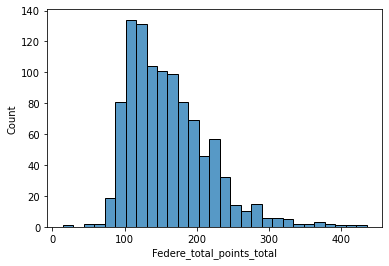

In [1155]:
sns.histplot(yt)


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


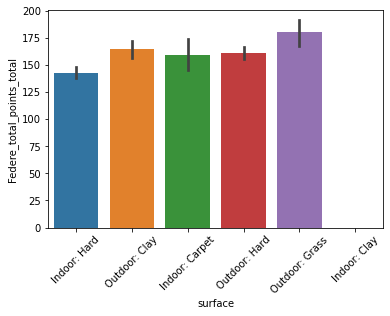

In [1156]:
#sns.boxplot(dft.surface, yt)#to see how varies the mean value and distributions on each kind of surface
sns.barplot(dft.surface, yt)
plt.xticks(rotation='45')
plt.show()

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


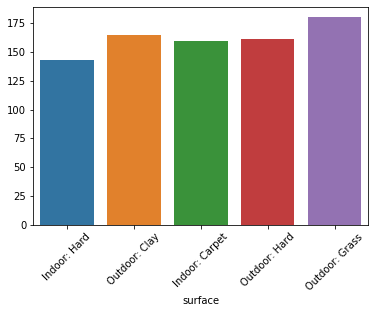

In [1157]:

sns.barplot(df.surface, ypred)#almost shows the same level of true scores
plt.xticks(rotation='45')
plt.show()

In [1158]:
xt.columns

Index(['const', 'Indoor: Hard', 'Outdoor: Clay', 'Outdoor: Grass',
       'Outdoor: Hard'],
      dtype='object')

In [1159]:
yt = df['Federe_total_points_total']
x1 = (pd.get_dummies(df['surface'], drop_first=True))
xtt = x1[['Indoor: Hard', 'Outdoor: Grass' ]]
xtt = sm.add_constant(xtt)
model_tt = sm.OLS(yt, xtt).fit(cov_type='HC2')
model_tt.summary()
ypred2 = model_tt.predict(xtt)
mean_absolute_error(yt, ypred2), sqrt(mean_squared_error(yt, ypred2))

(43.345852128373245, 55.43336440632084)

1)Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.

          -There are statistically significant different mean values among the coefficients
          -The grass outdoor has the latgest effect on  scoring thought the 'Indoor: Hard'
          has the largrst effect on losing the score .
          -Among the surface features, Indoor:Carpet has been remodved from the list due to multilinearity.
          -The features: Outdorr:Clay and Outdoor:Hard have not statistically significant 
          difference in mean  value so it seems it had to better be removed from the features' list.
          -Regarding the R-squered, it seems the goodness of fitting is not working well!!
          -From Durbin,Watson, there is homoscedasticity.

3)Answer the following: should your regression include a constant term? Why or why not? 
How would it change the interpretation of your coefficient and p-value?

          -By adding the constant term the R_squared decreased dramitically(0.03 to 0.8), 
          whearas the mean_absolute_error and mean_squared_error increased. Therefore, the constant term would be added.

3) Do a t-test to find that the largest coefficient is statistically

significantly different from the second largest 
(hint: you can run a t-test only with mean values and standard deviations)

In [1160]:
largest_Coef = df.loc[df.surface=='Outdoor: Grass']['Federe_total_points_total']
sec_larg_coef = df.loc[df.surface=='Indoor: Hard']['Federe_total_points_total']
sc.ttest_ind(sec_larg_coef,largest_Coef )
#there is statistically signoficant difference on mean of two predictors.
#it denotes also, there is reverse effect between two coefficients on scoring. 

Ttest_indResult(statistic=-6.235159193744308, pvalue=1.4064139933562834e-09)

## Exercise 2: Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [1161]:
# exercise 2
data_tr = pd.read_csv('../data/train.csv')
data_te = pd.read_csv('../data/test.csv')
data_ti = pd.concat((data_tr, data_te), axis=0)
df_t = data_ti.copy()
df_t.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1162]:
#df_t.columns

In [1163]:
df1 = df_t.drop(['PassengerId', 'Name', 'Cabin', 'Ticket',], axis=1).dropna()
#df1.head()

In [1164]:
#df1.isna().sum()

In [1165]:
#df1['Embarked']

In [1166]:
df1.Survived = df1.Survived.astype(int)#convert to integer type
df1.Sex = [1 if x=='male' else 0 for x in df1['Sex']]#to make binary
le = LabelEncoder()#to make classifing in classe:1, 2, 3
le.fit(['S', 'Q', 'C'])
#le.classes_
df1.Embarked = le.transform(df1.Embarked)
#df1.info()


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anacond

<AxesSubplot:xlabel='Age', ylabel='Fare'>

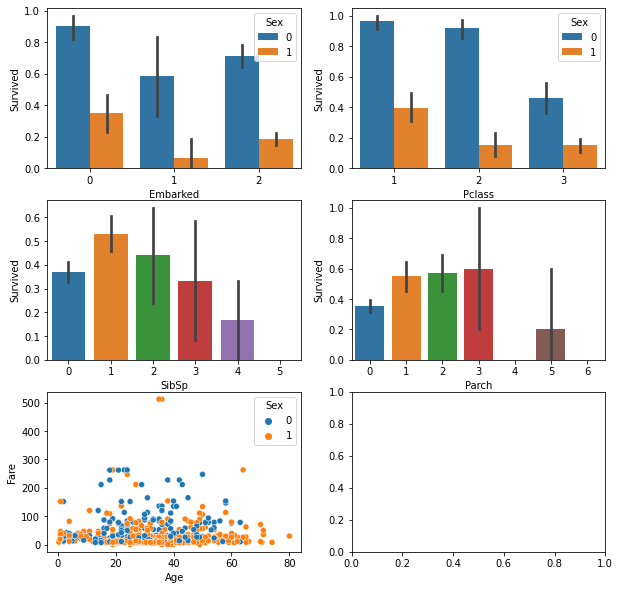

In [1167]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
sns.barplot(df1.Embarked, df1.Survived,  hue='Sex', data=df1,ax=axs[0, 0])
#sns.barplot(df1.Sex, df1.Survived, ax=axs[0, 1])#the gender effect on surviving
sns.barplot(df1.SibSp, df1.Survived, ax=axs[1, 0])#the number of sibbling aboard on surviving rate
sns.barplot(df1.Parch, df1.Survived, ax=axs[1, 1])#the effect od parent and children aboard on surviving
sns.barplot(df1.Pclass, df1.Survived, hue='Sex', data=df1, ax=axs[0, 1])
sns.scatterplot(df1.Age, df1.Fare, hue='Sex', data=df1, ax=axs[2, 0])


In [1168]:
#df1.columns

In [1169]:
y = df1.Survived#target value
x = df1[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]#explanatories variables

In [1170]:
def linear_regression(x, y): #difine the function aas pipeline to do linearregression to model easier and faster
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)#to devide the data to train and test parts
    model = LinearRegression()#make object from the regressor
    model.fit(x_train, y_train)#fit on linear regression
    ypred = model.predict(x_test)#predict the target value throught the test data
    print("medel's Accuracy(linear Regressioon): Score:", model.score(x_test, y_test),#to return the accuracy of fitted model in order to compare
                "mean error:", mean_absolute_error(y_test, ypred),
                "mean square error:", sqrt(mean_squared_error(y_test, ypred)))
    sns.distplot(model.predict(x_test))
    coef = model.coef_
    x.columns
    return list(zip(x.columns , coef))

medel's Accuracy(linear Regressioon): Score: 0.44801927804079344 mean error: 0.28889765826308356 mean square error: 0.36730042732749113


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[('Pclass', -0.1902910654206933),
 ('Sex', -0.46307788204956896),
 ('Age', -0.0062188474520318135),
 ('SibSp', -0.03959089719809216),
 ('Parch', -0.016041129351982108),
 ('Fare', 0.0003609898692614401),
 ('Embarked', -0.01864004780946154)]

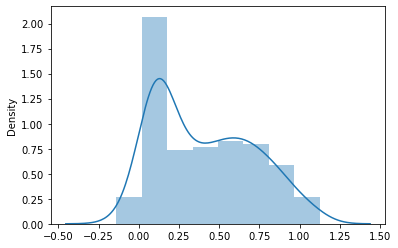

In [1171]:
linear_regression(x, y)#to use the function for regrssion

<AxesSubplot:>

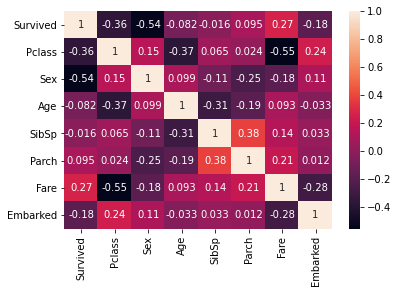

In [1172]:
sns.heatmap(df1.corr(), annot=True)#to find the correlation for interaction variables

In [1173]:
#def reg_ols(x, y):
    #x2=sm.add_constant(x)
    #est = sm.OLS(y, x2)
    #ypred_ols = est.predict(x2)
   # return print("medel's Accuracy(OLS):"
      #"mean error:", mean_absolute_error(y, ypred_ols),
      #"mean square error:", sqrt(mean_squared_error(y, ypred_ols)))
        
#reg_ols(x, y)

In [1174]:
#fitt on smf.ols as regressor for categorial data
y = df1.Survived#target value
x = df1[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]#explanatories variables
model_t = smf.ols(formula = ('Survived ~ Sex + Age + Pclass + Fare + Embarked + Parch + SibSp'), data=df1).fit(cov_type='HC2') #fitting model
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     115.1
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.48e-112
Time:                        20:33:13   Log-Likelihood:                -321.43
No. Observations:                 712   AIC:                             658.9
Df Residuals:                     704   BIC:                             695.4
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4026      0.077     18.280      0.000       1.252       1.553
Sex           -0.4842      0.034    -14.290      0.000      -0.551      -0.418
Age           -0.0065      0.001     -5.494      0.000      -0.009      -0.004
Pclass        -0.1903      0.024     -7.938      0.000      -0.237      -0.143
Fare           0.0002      0.000      0.635      0.526      -0.000       0.001
Embarked      -0.0298      0.020     -1.493      0.135      -0.069       0.009
Parch         -0.0102      0.020     -0.513      0.608      -0.049       0.029
SibSp         -0.0519      0.016     -3.165      0.002      -0.084      -0.020
==============================================================================
Omnibus:                       25.995   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.157
Skew:                           0.487   Prob(JB):                     7.69e-07
Kurtosis:                       3.027   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [1175]:
ypred_ols = model_t.predict(x)#predicting target value according to fitted model and list of features
print("medel's Accuracy(OLS):"
      "mean error:", mean_absolute_error(y, ypred_ols),
      "mean square error:", sqrt(mean_squared_error(y, ypred_ols)))

medel's Accuracy(OLS):mean error: 0.2966066755152604 mean square error: 0.3800367359774265


medel's Accuracy(linear Regressioon): Score: 0.3847526080923017 mean error: 0.29477903791304366 mean square error: 0.3794971423903221


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[('Pclass', -0.20217244340152127),
 ('Sex', -0.4972209964162514),
 ('Age', -0.007037182800828363),
 ('SibSp', -0.05751920360973418)]

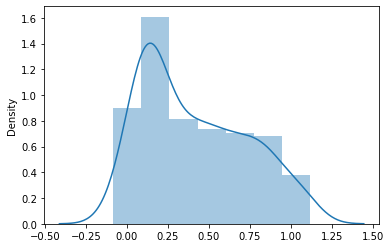

In [1176]:
y = df1.Survived#target value
x2 = df1[['Pclass', 'Sex', 'Age', 'SibSp']]
linear_regression(x2, y)

        Firstly, visualization has been done to choose the predictors.
        Between two types of regression(OLS , Linear) LinearRegression denotes 
        the better result according to alittle bit higher mean square error.
        then regarding the linear regression's result and OLS's result,
        few variables have been omitted from the feature list due to thier higher pvalue.
        Therefore the mean square value and absolut mean error increases versus the score decreased.
        Still there is not the best fitting as shown on predicted targel value distribution which is not completely normal.
        Overall, 'sex', 'Pclass' have predicted almost 40% correctly
        the key factors towards the titanic rescue decision. 
     

In [1177]:
#y = df1.Survived#target value
#x2 = df1[['Pclass', 'Sex', 'Age', 'SibSp']]#explanatories variables deudected because of thier pvalue>>0.05
#model_t2 = smf.ols(formula = ('Survived ~ Sex + Age + Pclass + SibSp'), data=df1).fit()
#model_t2.summary()

In [1178]:
#ypred_OLS = model_t2.predict(x2)#neww prediction for new shorter list of features
#print("medel's Accuracy(OLS):"
      #"mean error:", mean_absolute_error(y, ypred_OLS),
      #"mean square error:", sqrt(mean_squared_error(y, ypred_OLS)))

Regilarizationn

In [1179]:
df1['sib_Parch'] = (df1.SibSp + df1.Parch)
scaler = MinMaxScaler()#normalizing fare and age columns
scaler.fit(df1[['Age', 'Fare']])
df1[['age', 'fare']] = scaler.transform(df1[['Age', 'Fare']])
df1['class_Sex'] = (df1.Pclass ** (df1.Sex + 1)) * df1.age #adding square and cubic terms
df1.fare = pd.concat((df1.fare, df1.fare**2, df1.fare**3), axis=1)
#df1.head()

In [1180]:
df2 = df1.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1 )
df2.head()

,Survived,Embarked,sib_Parch,age,fare,class_Sex
0,0,2,1,0.271174,0.014151,2.440563
1,1,0,1,0.472229,0.139136,0.472229
2,1,2,0,0.321438,0.015469,0.964313
3,1,2,1,0.434531,0.103644,0.434531
4,0,2,0,0.434531,0.015713,3.910782


In [1181]:
df2.columns

Index(['Survived', 'Embarked', 'sib_Parch', 'age', 'fare', 'class_Sex'], dtype='object')

medel's Accuracy(linear Regressioon): Score: 0.2305198364755493 mean error: 0.38441311263757016 mean square error: 0.42742471911961877


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[('Embarked', -0.023558310502911625),
 ('sib_Parch', -0.0270514403607751),
 ('age', -0.10053427280080204),
 ('fare', 0.48908851953063176),
 ('class_Sex', -0.14901647782337735)]

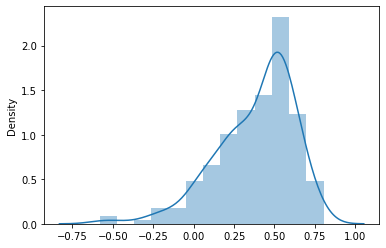

In [1182]:
y_new = df2.Survived# target value with normalization and polynomial correction
x_new = df2[['Embarked', 'sib_Parch', 'age', 'fare', 'class_Sex']]
linear_regression(x_new, y_new)

In [1317]:
def Lasso_regression(x, y, alpha): #difine the function aas pipeline to do linearregression to model easier and faster
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)#to devide the data to train and test parts
    ridge = Ridge(alpha=alpha)#make object from the regressor
    ridge.fit(x_train, y_train)#fit on linear regression
    ypred = ridge.predict(x_test)#predict the target value throught the test data
    sns.distplot(ridge.predict(x_test))

    return print("medel's Accuracy(linear Regressioon): Score:", ridge.score(x_test, y_test),#to return the accuracy of fitted model in order to compare
                "mean error:", mean_absolute_error(y_test, ypred),
                "mean squared error:", sqrt(mean_squared_error(y_test, ypred)))

medel's Accuracy(linear Regressioon): Score: 0.2228094073144753 mean error: 0.39942821954329866 mean squared error: 0.43845660261148445


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


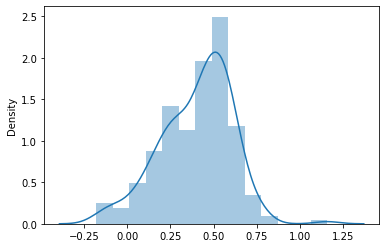

In [1318]:
Lasso_regression(x_new, y_new, alpha=0.4)  #l2 fitting

          After regularization with polynimial, minmaxscaler and some decreasing interaction of variabels, 
          the dsitribution of predicted target value goes to have more normal-like distribution.
          in linear regression the kurtosis is more than L2 regularization and
          also there is negatively skewed distribution in linear regression improved in L2 regularization.
          It means that the number of survived people in L2 is going to be closer to mode and median,
          on the orher word, survivor would be more.
          

## Exercise 3: House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    +MSSubClass: The building class
    +MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    +LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    +LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    +BldgType: Type of dwelling
    +HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    *1stFlrSF: First Floor square feet
    *2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    *3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [1376]:
# exercise 3
house_price = pd.read_csv('../data/house_price.csv')
hp = house_price.copy()
hp.iloc[:,10:30].head()
#hp.head()

,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation
0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc
1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock
2,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc
3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil
4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc


In [1377]:
hp.drop(['Id','MSSubClass', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage',
         'MasVnrType', 'GarageYrBlt', 'MasVnrArea', 'MSZoning', 'HouseStyle' ], axis=1, inplace=True)

In [1378]:
#filling nan value with replacing the previous value with nan
#hp.LotFrontage.fillna(method='ffill').isna().sum()
hp.BsmtQual.fillna(method='ffill').isna().sum()
hp.BsmtCond.fillna(method='ffill').isna().sum()  
hp.BsmtExposure.fillna(method='ffill').isna().sum()    
hp.BsmtFinType1.fillna(method='ffill').isna().sum()
hp.Electrical.dropna()
hp.BsmtFinType2.dropna()
hp.FireplaceQu.fillna(method='ffill').isna().sum()
hp.FireplaceQu.dropna().isna().sum()
hp.GarageType.fillna(method='ffill').isna().sum()
#hp.GarageYrBlt.fillna(hp.GarageYrBlt.mode()).dropna()
hp.GarageQual.fillna(method='ffill').isna().sum()
hp.GarageCond.fillna(method='ffill').isna().sum()
hp.GarageFinish.fillna(method='ffill').dropna()
#hp.MasVnrType.fillna(method='ffill').isna().sum() 
hp.iloc[:, 20:69].head(2)


,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [1379]:
#hp.columns

In [1380]:
#hp.MasVnrType.replace(np.nan, None).fillna('BrkFace').value_counts()
#I couldnot replace the NOne value, that's why i dropped it. I think it would be the effective feature!!!!

In [1381]:
data_column_category = hp.select_dtypes(exclude=[np.number]).columns#make a list for qualitative features of proporties
labelencoder = LabelEncoder()#make object for make numeric the categories
for i in data_column_category:#make loop to iterate for encoding
     hp[i] = labelencoder.fit_transform(hp[i])

hp.head()

,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,8450,1,3,3,0,4,0,5,2,2,...,0,0,0,0,0,2,2008,8,4,208500
1,9600,1,3,3,0,2,0,24,1,2,...,0,0,0,0,0,5,2007,8,4,181500
2,11250,1,0,3,0,4,0,5,2,2,...,0,0,0,0,0,9,2008,8,4,223500
3,9550,1,0,3,0,0,0,6,2,2,...,272,0,0,0,0,2,2006,8,0,140000
4,14260,1,0,3,0,2,0,15,2,2,...,0,0,0,0,0,12,2008,8,4,250000


In [1382]:
#onehot_encoder = OneHotEncoder(sparse=False)
#for i in data_column_category:
    #onehot_encoded = onehot_encoder.fit_transform(hp[data_column_category])
    
#onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))
#onehot_encoded_frame.head()

In [1383]:
price = hp.SalePrice #target value
features = hp.iloc[:, :-1] #predictors to predict target value

In [1384]:
price = hp.SalePrice #target value
features = hp.iloc[:, :-1] #predictors to predict target value

In [1385]:
est = sm.OLS(price, sm.add_constant(features)).fit(cov_type='HC2')
est.summary()

C:\Users\zmaso\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 68, but rank is 66
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:02:23   Log-Likelihood:                -17186.
No. Observations:                1460   AIC:                         3.451e+04
Df Residuals:                    1393   BIC:                         3.486e+04
Df Model:                          66                                         
Covariance Type:                  HC2                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.474e+06   1.25e+06      1.175      0.240   -9.84e+05    3.93e+06
LotArea           0.3773      0.175      2.151      0.031       0.034       0.721
Street         3.341e+04   1.52e+04      2.199      0.028    3630.307    6.32e+04
LotShape      -1000.4170    730.209     -1.370      0.171   -2431.600     430.766
LandContour    4092.5419   3019.810      1.355      0.175   -1826.178       1e+04
Utilities     -4.889e+04   1.57e+04     -3.105      0.002   -7.98e+04    -1.8e+04
LotConfig        60.7230    603.997      0.101      0.920   -1123.090    1244.536
LandSlope      7063.9910   7300.901      0.968      0.333   -7245.513    2.14e+04
Neighborhood    415.8593    200.124      2.078      0.038      23.624     808.094
Condition1     -904.6111   1165.142     -0.776      0.438   -3188.247    1379.025
Condition2    -7962.4597   8307.596     -0.958      0.338   -2.42e+04    8320.129
BldgType      -4869.4249   1115.987     -4.363      0.000   -7056.720   -2682.130
OverallQual    1.118e+04   1954.485      5.720      0.000    7348.849     1.5e+04
OverallCond    4458.2707   1061.558      4.200      0.000    2377.656    6538.886
YearBuilt       222.5928     79.995      2.783      0.005      65.806     379.380
YearRemodAdd      4.2051     54.645      0.077      0.939    -102.897     111.307
RoofStyle      2647.0736   1370.220      1.932      0.053     -38.508    5332.656
RoofMatl       4434.4639   3992.577      1.111      0.267   -3390.843    1.23e+04
Exterior1st   -1078.8403    652.853     -1.653      0.098   -2358.409     200.729
Exterior2nd     476.8739    595.117      0.801      0.423    -689.534    1643.281
ExterQual     -1.066e+04   2892.595     -3.686      0.000   -1.63e+04   -4993.888
ExterCond       597.5572   1231.055      0.485      0.627   -1815.266    3010.380
Foundation     1493.7724   1404.892      1.063      0.288   -1259.766    4247.311
BsmtQual      -8332.5599   1840.172     -4.528      0.000   -1.19e+04   -4725.889
BsmtCond       2998.8263   1178.283      2.545      0.011     689.434    5308.218
BsmtExposure  -2427.2416    889.774     -2.728      0.006   -4171.166    -683.317
BsmtFinType1   -616.6521   1406.567     -0.438      0.661   -3373.474    2140.169
BsmtFinSF1        5.5132     10.802      0.510      0.610     -15.658      26.685
BsmtFinType2    759.9531   1187.045      0.640      0.522   -1566.611    3086.518
BsmtFinSF2        5.0647      5.793      0.874      0.382      -6.290      16.419
BsmtUnfSF        -4.2694      2.840     -1.503      0.133      -9.836       1.297
TotalBsmtSF       6.3085     12.581      0.501      0.616     -18.349      30.966
Heating       -2206.3689   2830.759     -0.779      0.436   -7754.554    3341.816
HeatingQC      -794.4784    474.878     -1.673      0.094   -1725.223     136.266
CentralAir      549.5004   4065.258      0.135   

In [1386]:
#finding the most effective features on predicting the target value prediction throught  SelectKBest from sklearn library
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features, price)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
features_scores = pd.concat((dfscores, dfcolumns), axis=1)
features_scores.columns = ['scores', 'features']
x = pd.DataFrame(features_scores.nlargest(30, 'scores'))
x

,scores,features
0,1.011497e+07,LotArea
63,6.253332e+06,MiscVal
36,4.648841e+05,2ndFlrSF
26,3.999851e+05,BsmtFinSF1
62,3.835642e+05,PoolArea
28,3.688827e+05,BsmtFinSF2
29,2.747512e+05,BsmtUnfSF
37,2.448810e+05,LowQualFinSF
38,1.968501e+05,GrLivArea
30,1.747065e+05,TotalBsmtSF


In [1387]:
hp['LotArea'] = np.log(hp.LotArea + hp.PoolArea)**3
#hp['BldgType'] = hp.BldgType * hp.


In [1388]:
best_features = hp[['LotArea', '2ndFlrSF', 'PoolArea', 'Neighborhood', 'BsmtUnfSF',
                    'LowQualFinSF', 'GrLivArea','TotalBsmtSF','HeatingQC', 'ScreenPorch',
                    'WoodDeckSF', '1stFlrSF', 'EnclosedPorch', 'GarageArea', 'LotShape']]
price  = hp.SalePrice

In [1389]:
est = sm.OLS(price, best_features).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2159.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:02:27   Log-Likelihood:                         -17621.
No. Observations:                1460   AIC:                                  3.527e+04
Df Residuals:                    1446   BIC:                                  3.534e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea          16.0951      6.688      2.406      0.016       2.975      29.215
2ndFlrSF         38.5184      6.294      6.120      0.000      26.172      50.865
PoolArea        -56.7582     28.363     -2.001      0.046    -112.395      -1.122
Neighborhood    691.7011    186.806      3.703      0.000     325.260    1058.142
BsmtUnfSF       -13.2831      2.841     -4.676      0.000     -18.856      -7.710
LowQualFinSF    -44.5826     17.497     -2.548      0.011     -78.905     -10.261
GrLivArea        27.4796      5.925      4.638      0.000      15.858      39.101
TotalBsmtSF      49.1209      4.774     10.289      0.000      39.756      58.486
HeatingQC     -8146.4701    678.767    -12.002      0.000   -9477.944   -6814.996
ScreenPorch      60.6969     20.409      2.974      0.003      20.662     100.732
WoodDeckSF       45.5843      9.551      4.773      0.000      26.850      64.319
1stFlrSF         33.5437      7.084      4.735      0.000      19.647      47.440
EnclosedPorch   -59.3838     18.774     -3.163      0.002     -96.212     -22.556
GarageArea       78.5922      6.535     12.026      0.000      65.772      91.412
LotShape      -3289.5525    752.317     -4.373      0.000   -4765.303   -1813.803
==============================================================================
Omnibus:                      700.332   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77307.910
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                      38.561   Cond. No.                     2.25e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.89e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1390]:
ypred = est.predict(best_features)

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

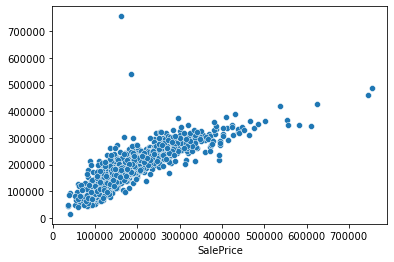

In [1334]:
sns.scatterplot(price, ypred)

    According the regression, all pvalue are in the range. the scatterplot also
    shows the roughly linear relatonship between predicted target value and true value which is good.
    Althought the r_squared denotes the fine goodness of fitting.
    the multicolinearity also is the main problom not solved!!
    the coefients are high. it could be solved through regularization as shown below with a good score.
    I don't have any idea about this much Error,  whether is it normal?
    two regression hae been done through Ridge and LinearRegression.
    

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


medel's Accuracy(linear Regressioon): Score: 0.8147818236982977 mean error: 19996.18497317676 mean squared error: 33865.53863198347


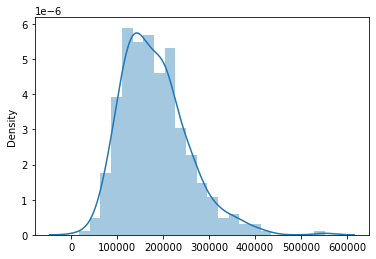

In [1343]:
Lasso_regression(features, price, .4)

medel's Accuracy(linear Regressioon): Score: 0.7173998636944485 mean error: 26002.826510578514 mean square error: 39005.587070096924


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[('LotArea', 7.037992531877036),
 ('2ndFlrSF', 38.288319481680254),
 ('PoolArea', -82.77254729906498),
 ('Neighborhood', 783.1912609262871),
 ('BsmtUnfSF', -11.873223648397136),
 ('LowQualFinSF', -41.92818027367242),
 ('GrLivArea', 31.226603335939252),
 ('TotalBsmtSF', 47.3189801577969),
 ('HeatingQC', -8233.486189180165),
 ('ScreenPorch', 52.73019714570185),
 ('WoodDeckSF', 51.61160929638796),
 ('1stFlrSF', 34.866464127931884),
 ('EnclosedPorch', -68.53509012690897),
 ('GarageArea', 76.0588162772241),
 ('LotShape', -3444.655847406622)]

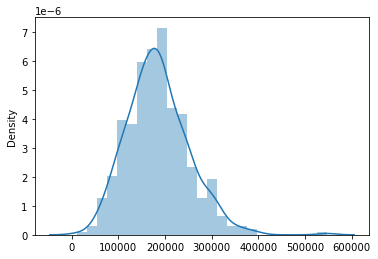

In [1342]:
linear_regression(best_features, price)